<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jerimiah_Willhite_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [20]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas==0.23.4

col_names = ['age', 'op_year', 'num_pos', 'survived']

#this dataset has no header, so header=None, and I put in more descriptive column names
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=col_names, header=None)

survival_map = {1: 1, 2: 0}

df['survived'] = df['survived'].map(survival_map)
#remapping as per the assignment

print(df.count()) #count looks correct
df.head()

age         306
op_year     306
num_pos     306
survived    306
dtype: int64


,age,op_year,num_pos,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
df.isna().sum()
#no NaNs

age         0
op_year     0
num_pos     0
survived    0
dtype: int64

In [49]:
df['survived'].value_counts()

1    225
0     81
Name: survived, dtype: int64

In [15]:
#Info for the following section
df['age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [73]:
df['op_year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_year, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [101]:
# TODO
import seaborn as sns
#1. compare num_pos vs. survival indexed by age

age_bins = pd.cut(df['age'], 4)

pd.crosstab(age_bins, [df['num_pos'], df['survived']])


num_pos         0      1      2     3     4      ... 22    23 24 25 28 30 35 46 52
survived         0   1  0   1  0  1  0  1  0  1  ...  0  1  0  0  1  1  1  0  1  0
age                                              ...                              
(29.947, 43.25]  7  26  1   7  1  7  0  3  0  4  ...  0  0  1  0  0  0  1  0  0  1
(43.25, 56.5]    5  36  2  20  2  4  6  5  2  5  ...  0  1  2  1  0  0  0  0  1  0
(56.5, 69.75]    5  46  4   5  1  3  0  3  0  1  ...  1  1  0  0  1  1  0  1  0  0
(69.75, 83.0]    2   9  1   1  1  1  1  2  1  0  ...  0  0  0  0  0  0  0  0  0  0

[4 rows x 50 columns]

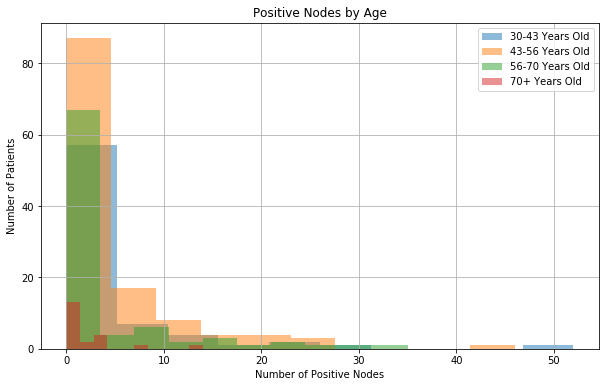

In [102]:

#1a: Plot comparing how many positive nodes different age groups had
df.groupby(age_bins).num_pos.hist(alpha=0.5, figsize=(10,6));
plt.title('Positive Nodes by Age');
plt.ylabel('Number of Patients')
plt.xlabel('Number of Positive Nodes')
plt.legend(['30-43 Years Old', '43-56 Years Old', '56-70 Years Old', '70+ Years Old'])
plt.show()

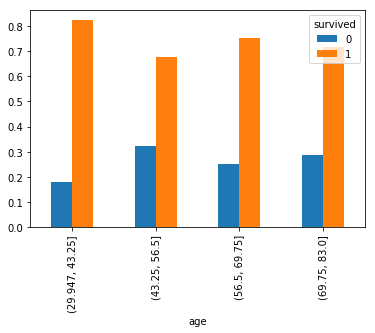

In [136]:
#1b: Plot comparing survivors/non-survivors of each age range
pd.crosstab(age_bins, df['survived'], normalize='index').plot.bar();

In [137]:
pd.crosstab(age_bins, df['survived'], normalize='index')

survived,0,1
age,,
"(29.947, 43.25]",0.178082,0.821918
"(43.25, 56.5]",0.322581,0.677419
"(56.5, 69.75]",0.250000,0.750000
"(69.75, 83.0]",0.285714,0.714286


In [140]:
age_bins.value_counts()

(43.25, 56.5]      124
(56.5, 69.75]       88
(29.947, 43.25]     73
(69.75, 83.0]       21
Name: age, dtype: int64

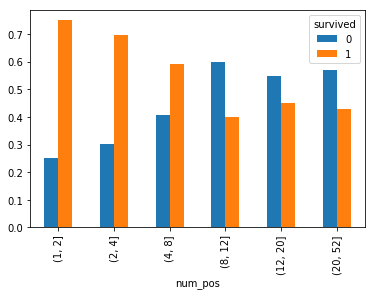

In [138]:
#1c: Plot comparing survivors/non-survivors of num_pos ranges
bins = [1, 2, 4, 8, 12, 20, 52]
num_pos_bins = pd.cut(df['num_pos'], bins)
pd.crosstab(num_pos_bins, df['survived'], normalize='index').plot.bar();

In [139]:
pd.crosstab(num_pos_bins, df['survived'], normalize='index')

survived,0,1
num_pos,,
"(1, 2]",0.250000,0.750000
"(2, 4]",0.303030,0.696970
"(4, 8]",0.407407,0.592593
"(8, 12]",0.600000,0.400000
"(12, 20]",0.550000,0.450000
"(20, 52]",0.571429,0.428571


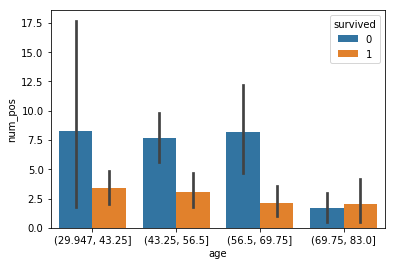

In [103]:
#1d: Figure this out with extra time
sns.barplot(x=age_bins, y=df['num_pos'], hue=df['survived'])

In [109]:
#2. compare num_pos vs. survival indexed by op_year
pd.crosstab(df['op_year'], [df['num_pos'], df['survived']])

num_pos  0      1     2     3     4     5   ... 21 22    23 24 25 28 30 35 46 52
survived  0   1  0  1  0  1  0  1  0  1  0  ...  0  0  1  0  0  1  1  1  0  1  0
op_year                                     ...                                 
58        4  12  0  6  2  1  0  3  2  0  0  ...  0  0  0  0  0  0  0  1  0  0  1
59        2   6  0  1  2  6  2  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0  0
60        0  11  1  6  0  1  0  2  0  2  0  ...  0  0  0  1  0  0  0  0  0  0  0
61        0  11  0  4  1  1  0  0  0  1  1  ...  0  0  0  0  0  1  1  0  0  0  0
62        1   8  0  3  0  1  1  2  0  0  2  ...  0  1  0  0  0  0  0  0  1  0  0
63        2  12  1  3  0  1  0  1  0  2  0  ...  0  0  0  1  1  0  0  0  0  0  0
64        4  13  1  3  0  1  0  1  0  1  0  ...  0  0  0  0  0  0  0  0  0  0  0
65        3  10  2  0  0  0  1  1  0  2  1  ...  0  0  1  1  0  0  0  0  0  0  0
66        2  13  0  3  0  1  1  0  1  1  0  ...  0  0  0  0  0  0  0  0  0  0  0
67        1  10  1  4  0  1  0  2  0  0  0  ...  0  0  0  0  0  0  0  0  0  1  0
68        0   8  1  0  0  1  0  0  0  1  0  ...  0  0  0  0  0  0  0  0  0  0  0
69        0   3  1  0  0  0  2  1  0  0  0  ...  1  0  1  0  0  0  0  0  0  0  0

[12 rows x 50 columns]

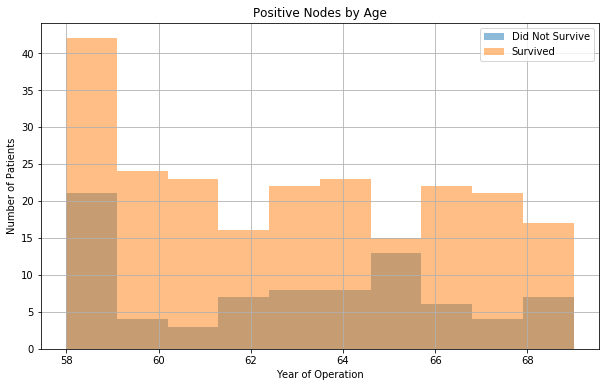

In [105]:
#2a: Plot comparing survival vs. year of surgery
df.groupby('survived').op_year.hist(alpha=0.5, figsize=(10,6));
plt.title('Positive Nodes by Age');
plt.ylabel('Number of Patients')
plt.xlabel('Year of Operation')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

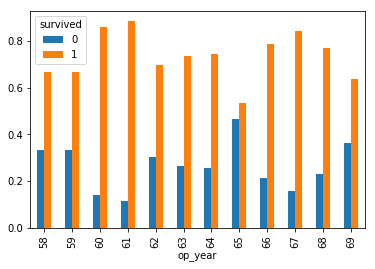

In [135]:
pd.crosstab(df['op_year'], df['survived'], normalize='index').plot.bar();

In [134]:
pd.crosstab(df['op_year'], df['survived'], normalize='index')

survived,0,1
op_year,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


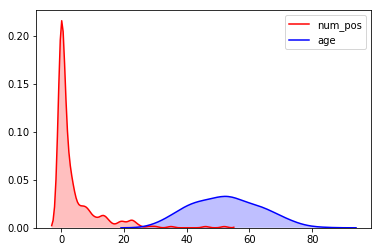

In [127]:
#3 figure out how to get three variables in this with more time
p1=sns.kdeplot(df['num_pos'], shade=True, color="r")
p1=sns.kdeplot(df['age'], shade=True, color="b")

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. Age seems to have a positive relationship with survival (as seen in 1b). Younger patients had a higher survival rate than older patients by anywhere from 7 - 15%.
2. It looks like the main negative factor in survival was the number of positive axillary nodes that were detected (as seen in figure 1c).  There's a clear switch where after 8-12 nodes, the percentage of non-survivors > the percentage of survivors.
3. 43-56-year-olds had on average a higher number of positive nodes (there were some outlying exceptions), and they also had lower survival rates than any of the other age groups. There were also more of them than other groups, so there's a decent chance that there isn't enough data, and that if more data from groups of other age ranges was given, those other age ranges may have similar survival rates.